In [13]:
import time
from Arm_Lib import Arm_Device
Arm  = Arm_Device()

In [14]:
from roboticstoolbox import *
from spatialmath import *
from math import pi
import numpy as np

%matplotlib widget

In [15]:
DFbot = DHRobot(
    [
        RevoluteDH(d=0.04145,alpha=np.pi/2,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(a=-0.08285,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(a=-0.08285,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(alpha=-np.pi/2,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(d=0.11,qlim=np.array([-np.pi,3/2*np.pi]))
    ],
    name = "DFbot",
)
print(DFbot)

DHRobot: DFbot, 5 joints (RRRRR), dynamics, standard DH parameters
┌─────┬─────────┬──────────┬────────┬─────────┬────────┐
│ θⱼ  │   dⱼ    │    aⱼ    │   ⍺ⱼ   │   q⁻    │   q⁺   │
├─────┼─────────┼──────────┼────────┼─────────┼────────┤
│  q1 │ 0.04145 │        0 │  90.0° │ -180.0° │ 180.0° │
│  q2 │       0 │ -0.08285 │   0.0° │ -180.0° │ 180.0° │
│  q3 │       0 │ -0.08285 │   0.0° │ -180.0° │ 180.0° │
│  q4 │       0 │        0 │ -90.0° │ -180.0° │ 180.0° │
│  q5 │    0.11 │        0 │   0.0° │ -180.0° │ 270.0° │
└─────┴─────────┴──────────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘



In [16]:
def convert_to_jointAngle(radian):
    
    deg = [x/np.pi*180 for x in radian] #convert radian state to degree

    j1 = +deg[0] + 90
    j2 = -deg[1]
    j3 = -deg[2] + 90
    j4 = -deg[3] + 180
    j5 = +deg[4] + 90
    return [j1,j2,j3,j4,j5]

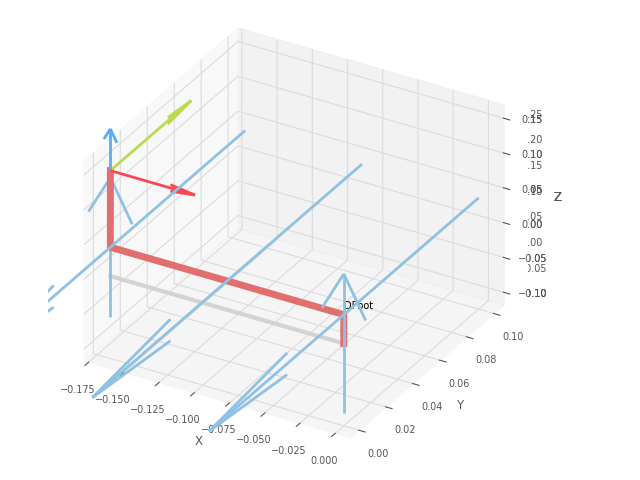

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'DFbot')

In [17]:
DFbot.plot([0,0,0,0,0])

In [18]:
state0 = [0,0,0,0,0]
state0_joint = convert_to_jointAngle(state0)
T0 = DFbot.fkine(state0)
print(T0)
print(state0_joint)

   1         0         0        -0.1657    
   0         1         0         0         
   0         0         1         0.1515    
   0         0         0         1         

[90.0, -0.0, 90.0, 180.0, 90.0]


In [19]:
claw_angle = 90

In [68]:
Arm.Arm_serial_servo_write6(state0_joint[0],state0_joint[1],state0_joint[2],state0_joint[3],state0_joint[4],claw_angle,3000)

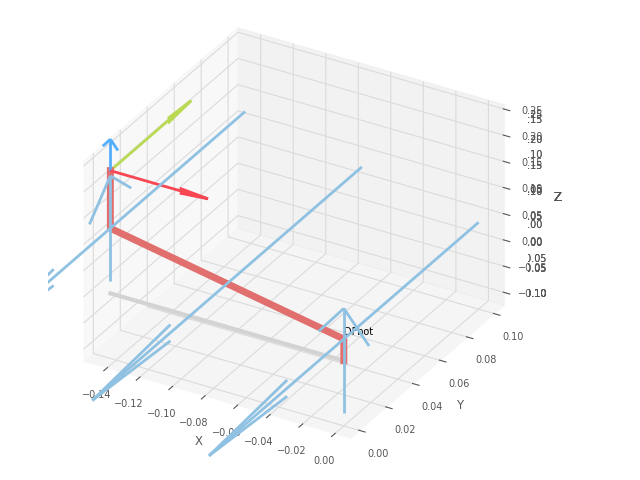

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'DFbot')

In [64]:
state1 = [np.pi/3, -np.pi/3, np.pi/6, np.pi, 0]
DFbot.plot(state1)

In [22]:
T1 = DFbot.fkine(state1)
T1

  -0.433    -0.866    -0.25     -0.08409   
  -0.75      0.5      -0.433    -0.1456    
   0.5       0        -0.866     0.05936   
   0         0         0         1         


In [23]:
state1_joint = convert_to_jointAngle(state1)

In [29]:
Arm.Arm_serial_servo_write6(state1_joint[0],state1_joint[1],state1_joint[2],state1_joint[3],state1_joint[4],claw_angle,3000)

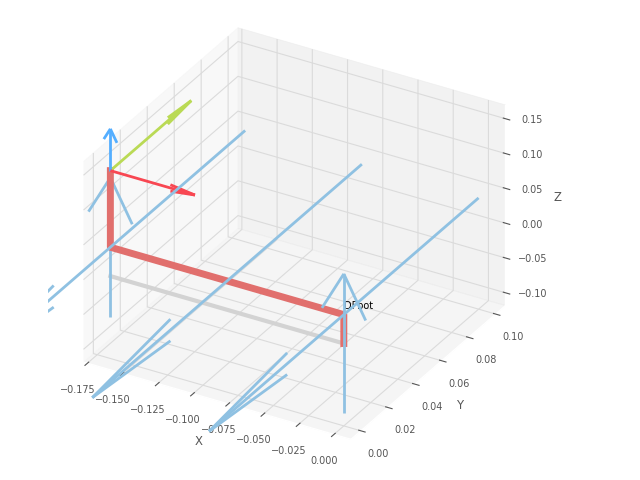

PyPlot3D backend, t = 1.0000000000000002, scene:
  robot: Text(0.0, 0.0, 'DFbot')

In [24]:
import roboticstoolbox as rtb
qt = rtb.tools.trajectory.jtraj(state0,state1,20)
DFbot.plot(qt.q,backend='pyplot')

In [25]:
qt.q

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.40875427e-03, -1.40875427e-03,  7.04377136e-04,
         4.22626281e-03,  0.00000000e+00],
       [ 1.03666721e-02, -1.03666721e-02,  5.18333604e-03,
         3.11000162e-02,  0.00000000e+00],
       [ 3.20756981e-02, -3.20756981e-02,  1.60378490e-02,
         9.62270942e-02,  0.00000000e+00],
       [ 6.94539962e-02, -6.94539962e-02,  3.47269981e-02,
         2.08361989e-01,  0.00000000e+00],
       [ 1.23440454e-01, -1.23440454e-01,  6.17202271e-02,
         3.70321363e-01,  0.00000000e+00],
       [ 1.93299187e-01, -1.93299187e-01,  9.66495936e-02,
         5.79897561e-01,  0.00000000e+00],
       [ 2.76924042e-01, -2.76924042e-01,  1.38462021e-01,
         8.30772125e-01,  0.00000000e+00],
       [ 3.71143101e-01, -3.71143101e-01,  1.85571550e-01,
         1.11342930e+00,  0.00000000e+00],
       [ 4.72023186e-01, -4.72023186e-01,  2.36011593e-01,
         1.41606956e+00

In [62]:
#Joint space interpolation.
Arm.Arm_serial_servo_write6(state0_joint[0],state0_joint[1],state0_joint[2],state0_joint[3],state0_joint[4],claw_angle,3000)
time.sleep(3.5)
for k in range(len(qt.q)):
    state_joint = convert_to_jointAngle(qt.q[k])
    Arm.Arm_serial_servo_write6(state_joint[0],state_joint[1],state_joint[2],state_joint[3],state_joint[4],claw_angle,1500)
    time.sleep(0.1)

In [32]:
qt2 = rtb.tools.trajectory.ctraj(T0,T1,20)
qt2

0:
   1         0         0        -0.1657    
   0         1         0         0         
   0         0         1         0.1515    
   0         0         0         1         
1:
   0.9999   -0.002286 -0.01438  -0.1652    
   0.002166  1        -0.008323 -0.0009078  
   0.0144    0.008291  0.9999    0.1509    
   0         0         0         1         
2:
   0.9983   -0.009853 -0.05736  -0.1637    
   0.007941  0.9994   -0.03346  -0.003631  
   0.05766   0.03295   0.9978    0.1492    
   0         0         0         1         
3:
   0.9914   -0.02479  -0.1283   -0.1611    
   0.01513   0.997    -0.07577  -0.00817   
   0.1298    0.07319   0.9888    0.1463    
   0         0         0         1         
4:
   0.973    -0.0504   -0.2251   -0.1576    
   0.01998   0.9906   -0.1354   -0.01452   
   0.2298    0.1273    0.9649    0.1423    
   0         0         0         1         
5:
   0.9347   -0.09084  -0.3436   -0.153     
   0.01722   0.9772   -0.2115   -0.02269   
   0.355     

In [51]:
#inverse kinematics:
pose_list = [state0]
for i in range(len(qt2)):
    pose = DFbot.ikine_LM(qt2[i],q0=state0,ilimit=100,slimit=100,joint_limits=True,tol=0.002)
    if pose.success == True:
        pose_list.append(pose.q)
pose_list

[[0, 0, 0, 0, 0],
 array([0., 0., 0., 0., 0.]),
 array([ 0.00543386,  0.00114065,  0.00471994,  0.00829922, -0.00320753]),
 array([ 0.0757195 ,  0.00029543,  0.0267429 ,  0.03010471, -0.06760599]),
 array([ 0.23873162, -0.00561331,  0.071667  ,  0.07345823, -0.22143706]),
 array([ 0.41966369, -0.64398557,  1.37701426, -0.46985183, -0.38804655]),
 array([ 0.49586544, -0.76546702,  1.63247453, -0.45347705, -0.44411891]),
 array([ 0.53746768, -0.90604103,  1.8678184 , -0.36546715, -0.45958962]),
 array([ 0.56734811, -1.16094058,  2.20499659, -0.23863674, -0.45712224]),
 array([ 0.59101597, -1.42061412,  2.40461748,  0.03167304, -0.44508487]),
 array([ 0.61401248, -1.67160302,  2.48263307,  0.41436513, -0.42788303]),
 array([ 0.63899952, -1.86562696,  2.4477134 ,  0.85253529, -0.40614268]),
 array([ 0.66811774, -1.9646499 ,  2.3221097 ,  1.28579779, -0.37896015]),
 array([ 0.70404966, -1.96561555,  2.13547192,  1.68109019, -0.34417347]),
 array([ 0.75055567, -1.88725703,  1.91405587,  2.02

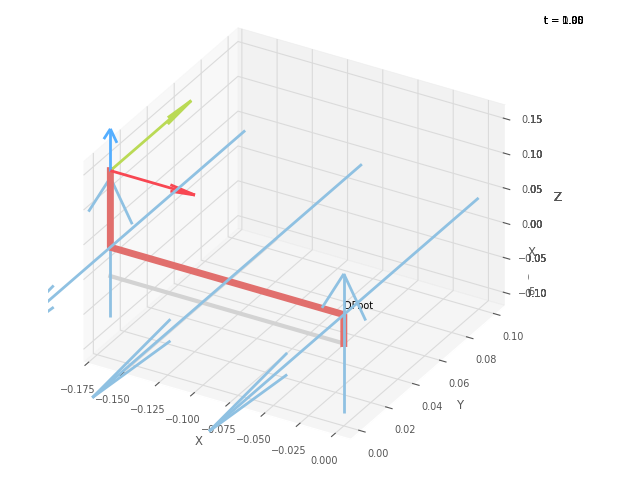

PyPlot3D backend, t = 1.0500000000000003, scene:
  robot: Text(0.0, 0.0, 'DFbot')

In [67]:
pose_array = np.array(pose_list)
DFbot.plot(pose_array,backend='pyplot')

In [65]:
#Cartesian space interpolation:
Arm.Arm_serial_servo_write6(state0_joint[0],state0_joint[1],state0_joint[2],state0_joint[3],state0_joint[4],claw_angle,3000)
time.sleep(3.5)
for k in range(len(pose_array)):
    state_joint = convert_to_jointAngle(pose_array[k])
    Arm.Arm_serial_servo_write6(state_joint[0],state_joint[1],state_joint[2],state_joint[3],state_joint[4],claw_angle,3000)
    time.sleep(0.1)

参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！
参数传入范围不在0-180之内！


In [69]:
del Arm